# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [126]:
! pip install citipy

ERROR: Error while checking for conflicts. Please file an issue on pip's issue tracker: https://github.com/pypa/pip/issues/new
Traceback (most recent call last):
  File "/Users/roman/opt/anaconda3/envs/PyData/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/Users/roman/opt/anaconda3/envs/PyData/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/roman/opt/anaconda3/envs/PyData/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/Users/roman/opt/anaconda3/envs/PyData/lib/python3.6/site-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
Attrib

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [128]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [129]:

# set lists for the dataframe
city_data = []
cloudiness = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
countries = []

# set initial count quantities for organization
count = 0
index_count = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count > 49:
            count = 0
            index_count += 1
            city_data.append(city)
        else:
            count += 1
            city_data.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 0 of Set 1 | toora-khem
Processing Record 0 of Set 1 | airai
Processing Record 0 of Set 1 | manta
Processing Record 0 of Set 1 | sorland
Processing Record 0 of Set 1 | markova
Processing Record 0 of Set 1 | saldanha
Processing Record 0 of Set 1 | ushuaia
Processing Record 0 of Set 1 | vao
Processing Record 0 of Set 1 | castro
Processing Record 0 of Set 1 | bambous virieux
Processing Record 0 of Set 1 | lavrentiya
Processing Record 0 of Set 1 | geraldton
Processing Record 0 of Set 1 | mountain home
City not found. Skipping...
Processing Record 0 of Set 1 | deputatskiy
Processing Record 0 of Set 1 | itabira
Processing Record 0 of Set 1 | albany
Processing Record 0 of Set 1 | bredasdorp
Processing Record 0 of Set 1 | ponta do sol
Processing Record 0 of Set 1 | thompson
Processing Record 0 of Set 1 | punta arenas
Processing Record 0 of Set 1 | ipixuna
Processing Record 0 of Set 1 | mataura
Processing Record 0 of Set 1 | ancud
Processing Record 0 of Set 1 | sibut
City not 

Processing Record 0 of Set 1 | kachiry
Processing Record 0 of Set 1 | yellowknife
Processing Record 0 of Set 1 | najran
Processing Record 0 of Set 1 | lagoa
Processing Record 0 of Set 1 | tuatapere
Processing Record 0 of Set 1 | newport
Processing Record 0 of Set 1 | talnakh
Processing Record 0 of Set 1 | georgetown
Processing Record 0 of Set 1 | petauke
Processing Record 0 of Set 1 | taraza
City not found. Skipping...
Processing Record 0 of Set 1 | lermontovka
Processing Record 0 of Set 1 | peniche
Processing Record 0 of Set 1 | komsomolskiy
City not found. Skipping...
Processing Record 0 of Set 1 | iqaluit
Processing Record 0 of Set 1 | kodinsk
Processing Record 0 of Set 1 | jaguariaiva
Processing Record 0 of Set 1 | kozhevnikovo
Processing Record 0 of Set 1 | provideniya
Processing Record 0 of Set 1 | saint-joseph
Processing Record 0 of Set 1 | northam
Processing Record 0 of Set 1 | shetpe
Processing Record 0 of Set 1 | bletchley
City not found. Skipping...
Processing Record 0 of Se

Processing Record 0 of Set 1 | payson
City not found. Skipping...
Processing Record 0 of Set 1 | kencong
Processing Record 0 of Set 1 | fayaoue
Processing Record 0 of Set 1 | lewistown
Processing Record 0 of Set 1 | vanavara
Processing Record 0 of Set 1 | mango
City not found. Skipping...
City not found. Skipping...
Processing Record 0 of Set 1 | isangel
Processing Record 0 of Set 1 | salamiyah
City not found. Skipping...
Processing Record 0 of Set 1 | carauari
Processing Record 0 of Set 1 | panaba
Processing Record 0 of Set 1 | osinki
Processing Record 0 of Set 1 | itambacuri
Processing Record 0 of Set 1 | zambezi
City not found. Skipping...
Processing Record 0 of Set 1 | zhigansk
Processing Record 0 of Set 1 | khandyga
Processing Record 0 of Set 1 | kosh-agach
City not found. Skipping...
City not found. Skipping...
Processing Record 0 of Set 1 | prainha
City not found. Skipping...
Processing Record 0 of Set 1 | pontianak
Processing Record 0 of Set 1 | jerico
City not found. Skipping.

### Convert Raw Data to DataFrame

In [130]:
# Export the city data into a .csv.
# Display the DataFrame


city_df = pd.DataFrame ({
    "City": city_data,
    "Cloudiness": cloudiness,
    "Country": countries,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Export the city data into a .csv file
city_df.to_csv("../output_data/weatherpy_data.csv")

# Display the DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,toora-khem,99,RU,1603251245,77,52.47,96.11,34.81,2.98
1,airai,13,TL,1603251245,35,-8.93,125.41,81.61,4.59
2,manta,75,EC,1603251245,78,-0.95,-80.73,73.40,12.75
3,sorland,40,NO,1603251174,69,67.67,12.69,37.40,6.93
4,markova,96,UA,1603251094,76,48.68,24.41,38.50,6.73


In [131]:
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,532.000000,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000
mean,53.610902,1.603251e+09,74.958647,22.245620,19.092538,60.460977,7.469229
std,39.307817,8.367129e+01,20.792631,31.938872,87.254873,20.108871,5.106327
min,0.000000,1.603250e+09,14.000000,-54.800000,-175.200000,6.800000,0.070000
25%,11.000000,1.603251e+09,65.000000,-3.107500,-52.765000,44.600000,3.500000
50%,60.500000,1.603251e+09,79.000000,25.005000,20.480000,64.540000,6.050000
75%,92.250000,1.603251e+09,92.000000,49.792500,93.070000,76.970000,10.290000
max,100.000000,1.603251e+09,100.000000,78.220000,179.320000,98.600000,30.090000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [132]:
#  Get the indices of cities that have humidity over 100%.


In [133]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

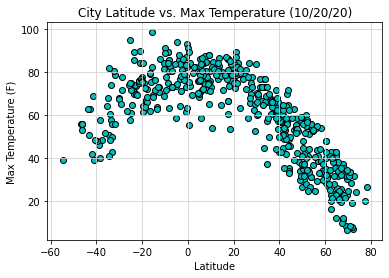

In [157]:
plt.scatter(city_df["Lat"],city_df["Max Temp"],edgecolors="black",facecolors="c")
plt.title("City Latitude vs. Max Temperature (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

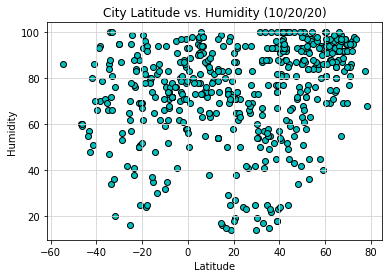

In [135]:
plt.scatter(city_df["Lat"],city_df["Humidity"],edgecolors="black",facecolors="c")
plt.title("City Latitude vs. Humidity (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

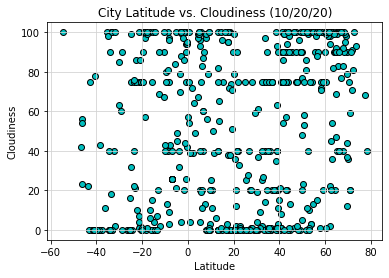

In [136]:
plt.scatter(city_df["Lat"],city_df["Cloudiness"],edgecolors="black",facecolors="c")
plt.title("City Latitude vs. Cloudiness (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

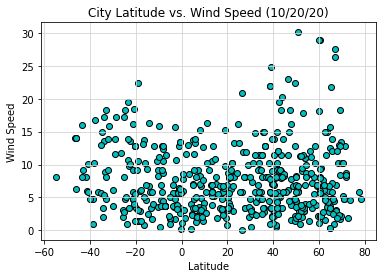

In [137]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"],edgecolors="black",facecolors="c")
plt.title("City Latitude vs. Wind Speed (10/20/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/fig4.png")
plt.show()

## Linear Regression

In [138]:
north_city_df = city_df.loc[city_df["Lat"] > 0]

north_city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,toora-khem,99,RU,1603251245,77,52.47,96.11,34.81,2.98
3,sorland,40,NO,1603251174,69,67.67,12.69,37.40,6.93
4,markova,96,UA,1603251094,76,48.68,24.41,38.50,6.73
10,lavrentiya,83,RU,1603251247,92,65.58,-171.00,38.50,7.18
12,mountain home,55,CO,1603251248,74,13.37,-81.37,82.74,3.78


In [139]:
south_city_df = city_df.loc[city_df["Lat"] < 0]

south_city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,airai,13,TL,1603251245,35,-8.93,125.41,81.61,4.59
2,manta,75,EC,1603251245,78,-0.95,-80.73,73.40,12.75
5,saldanha,0,ZA,1603250947,81,-33.01,17.94,42.80,4.70
6,ushuaia,100,AR,1603251247,86,-54.80,-68.30,39.20,8.05
7,vao,86,NC,1603251135,84,-22.67,167.48,73.42,13.56


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

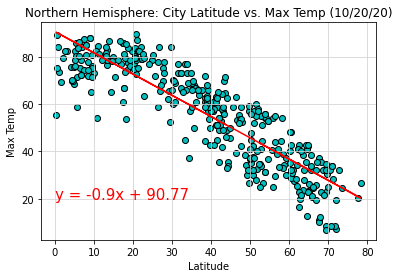

In [140]:
plt.scatter(north_city_df["Lat"],north_city_df["Max Temp"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_df["Lat"],north_city_df["Max Temp"])
regress_values = north_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Northern Hemisphere: City Latitude vs. Max Temp (10/20/20)")
plt.plot(north_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

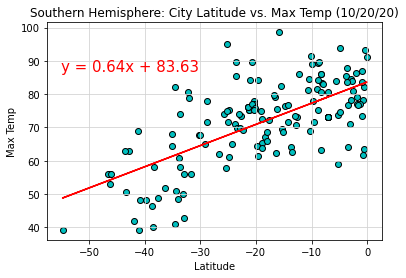

In [148]:
plt.scatter(south_city_df["Lat"],south_city_df["Max Temp"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_df["Lat"],south_city_df["Max Temp"])
regress_values = south_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Southern Hemisphere: City Latitude vs. Max Temp (10/20/20)")
plt.plot(south_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

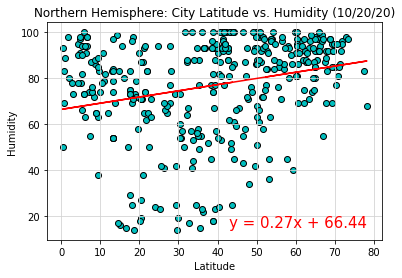

In [149]:
plt.scatter(north_city_df["Lat"],north_city_df["Humidity"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_df["Lat"],north_city_df["Humidity"])
regress_values = north_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Northern Hemisphere: City Latitude vs. Humidity (10/20/20)")
plt.plot(north_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(43,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

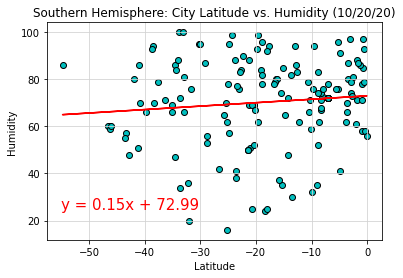

In [155]:
plt.scatter(south_city_df["Lat"],south_city_df["Humidity"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_df["Lat"],south_city_df["Humidity"])
regress_values = south_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Southern Hemisphere: City Latitude vs. Humidity (10/20/20)")
plt.plot(south_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

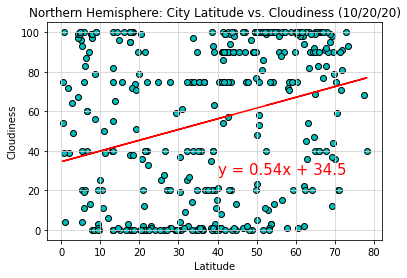

In [151]:
plt.scatter(north_city_df["Lat"],north_city_df["Cloudiness"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_df["Lat"],north_city_df["Cloudiness"])
regress_values = north_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (10/20/20)")
plt.plot(north_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,28),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

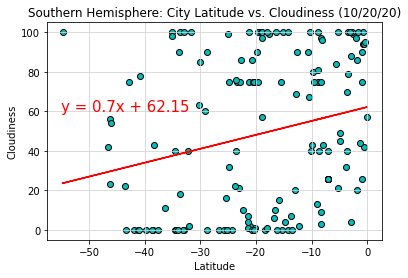

In [152]:
plt.scatter(south_city_df["Lat"],south_city_df["Cloudiness"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_df["Lat"],south_city_df["Cloudiness"])
regress_values = south_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (10/20/20)")
plt.plot(south_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

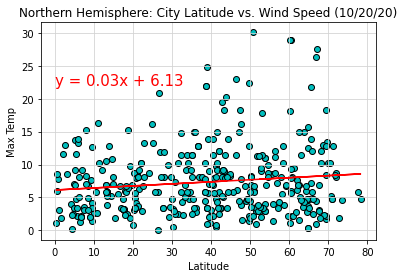

In [153]:
plt.scatter(north_city_df["Lat"],north_city_df["Wind Speed"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_df["Lat"],north_city_df["Wind Speed"])
regress_values = north_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (10/20/20)")
plt.plot(north_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,22),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

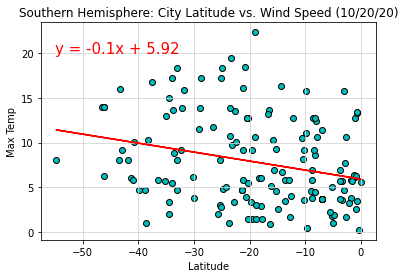

In [154]:
plt.scatter(south_city_df["Lat"],south_city_df["Wind Speed"],edgecolors="black",facecolors="c")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_df["Lat"],south_city_df["Wind Speed"])
regress_values = south_city_df["Lat"] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (10/20/20)")
plt.plot(south_city_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig("../output_data/fig12.png")
plt.show()